## Assignment 4:Random Forests and Gradient Boosting
NOTE : PLEASE DO NOT POST/SHARE THE CODE OR YOUR SOLUTIONS ON THE WEB/GIT except CANVAS FOR GRADING

References:
https://towardsdatascience.com/predicting-housing-prices-using-a-scikit-learns-random-forest-model-e736b59d56c5
https://www.kaggle.com/sanikamal/xgboost-boston-housing-dataset
https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d 

Problem Statement : Impressed with your initial assessment (based on assignmentt 2) of the market value of residential real estate,  the real estate brokerage wants to extend your contract to deliver on your final recommendation.

Background Materials/Data :
This individual assignment involves building up on the conventional methods used in assignment 2 and adding random forests and boosting algorithms to the Boston Housing Study dataset. For your convenience, the data set (comma-delimited file boston.csv) is added as part of the archive along with the initial code to get started.

Instructions:
- Use all explanatory variables (with the exception of neighborhood) and all 506 census tract observations from the Boston Housing Study. Use one of two response variables: 
   (1) the median value of homes in thousands of 1970 dollars or 
   (2) the log median value of homes in thousands of 1970 dollars. 
- Employ at least TWO regression modeling methods selected from those discussed in Chapter 4 of the Géron (2017) textbook: linear regression, ridge regression, lasso regression, and elastic net. 
- Evaluate these methods within a cross-validation design, using root mean-squared error (RMSE) as an index of prediction error.
- Python scikit-learn should be your primary environment for conducting this research. Note that it is not necessary to employ polynomial regression in this assignment.
- Try alternative versions of random forests and gradient boosting. Select a best modeling method for the Boston Housing Study. Employ that method on the full data set, obtaining results that you can report to management.
- Of the modeling methods examined in your study, which would you recommend to management and why? Reviewing the results of the random forests and gradient boosting model you have selected to present to management, which explanatory variables are most important in predicting home prices?

Programming Notes
Note that one of the key parameters in setting up random forests is the number of explanatory variables to include in the individual trees.  This is given by the max_features meta-parameter. You might try alternative values for this parameter as you fit random forests to the Boston Housing Study data.

With 12 explanatory variables, the range of possible values for max_features is from 1 to 12.  
max_features = 1  forces each tree to split on a single feature ... not ability to detect interaction effects
max_features = 12 means that there will be no randomness in the features being considered for each tree ... could lead to overfitting

Müller and Guido (2017) suggest using max_features = ‘log2’ for random forest regression problems and max_features = ‘sqrt’ for classification problems.

Regarding the other meta-parameters, ensure that bootstrap = True always, and set high values for n_estimators (ex: n_estimators = 100) so that estimators are more stable. 

Müller, A. C., & Guido, S. (2017). Introduction to machine learning with Python: A guide for data scientists. Sebastopol, CA: O’Reilly. [ISBN-13: 978-1449369415]. Code examples here (https://github.com/amueller/introduction_to_ml_with_python)
 

Deliverables and File Formats
- Python notebook that address the problem and the writeup as indicated towards the end of this notebook (Audience:Director Data Science/Analytics)

Optional (Audience:Business/C-Suite) - Additional 20 points
1. Provide a double-spaced paper with a two-page maximum for the text. The paper in pdf format should include 
    (1) Summary and problem definition for management; 
    (2) Discussion of the methodology, data findings and traditional machine learning methods employed; 
    (3) List assumptions, programming work, issues along with model evaluation metrics; and 
    (4) Review of results/ insight swith recommendations for management.

Formatting Python Code
Refer to Google’s Python Style Guide (https://google.github.iostyleguide/pyguide.html) for ideas about formatting Python code:


NOTE : 
- Below is the starter code and please feel free to update/edit/change to provide your thoughts/solutions to the problem. 
- Comment often and in detail, highlighting major sections of code, describing the thinking behind the programming methods being employed.
- This code has a lot of errors so please make sure to updated all the cells based on best practices along with your analysis/findings.


GRADING GUIDELINES (100 points)
--------------------------------
(1) Data preparation, exploration, visualization (20 points)
(2) Review research design and modeling methods (20 points)
(3) Review results, evaluate models (20 points)
(4) Implementation and programming (20 points)
(5) Exposition, problem description, and management recommendations (20 points)

Note: Try to see if you can embed this structure ( ML end to end pipeline )
- Look at the big picture/Problem Statement/Business Problem
- Get the data.
- Discover and visualize the data to gain insights.
- Prepare the data for Machine Learning algorithms.
- Select a model and train it.
- Fine-tune your model.
- Present your solution.

In [ ]:
# Boston Housing Study (Python)
# using data from the Boston Housing Study case
# as described in "Marketing Data Science: Modeling Techniques
# for Predictive Analytics with R and Python" (Miller 2015)

# Here we use data from the Boston Housing Study to evaluate
# regression modeling methods within a cross-validation design.

In [31]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [32]:
# Import base packages into the namespace for this program & # modeling routines from Scikit Learn packages

%matplotlib inline
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt  # static plotting
import numpy as np               # arrays and math functions
import os
import pandas as pd              # data frame operations 
from pandas.plotting import scatter_matrix
import pylab as pl
import seaborn as sns            # pretty plotting, including heat map
import sklearn
import sklearn.linear_model
from math import sqrt
from sklearn import linear_model
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import KFold 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Decision Trees
# from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz, DecisionTreeRegressor
from IPython.display import Image
# from sklearn.cross_validation import ShuffleSplit

from decimal import Decimal

In [33]:
# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# although we standardize X and y variables on input,
# we will fit the intercept term in the models
# Expect fitted values to be close to zero
SET_FIT_INTERCEPT = True

In [ ]:
#S2 Mount Google Drive to Colab Enviorment
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
#S3 Establish working directory
import os # Operation System
os.getcwd()
%cd /content/gdrive/My Drive/Assignments/4/
!pwd
!ls
print('Working Directory')
print(os.getcwd())
work_dir = "/content/gdrive/My Drive/Assignments/4/"

In [35]:
# read data for the Boston Housing Study
# creating data frame restdata
# initial work with the data set
boston_input = pd.read_csv(work_dir+'./data/boston.csv')
prices = boston_input['mv']

#LOCAL INSTANCE
#boston_input = pd.read_csv('./data/boston.csv')
#prices = boston_input['mv']

###### DESCRIPTION OF THE DATA SET   { IS THIS TRUE ?? }

There are 14 features in the boston housing dataset. Of the 14, "mv" is the response variable and the remaining 13 are the target variables. One of the features, "neighborhood" is a categorical variable with 93 unique values and cambridge having the highest frequency. No further analysis needed for the neighborhood as it has to be dropped from the dataframe.
Note: Though the neighborhood feature is being dropped and not being used in the analysis, it's still good practice to at least understand some basic information about the feature before dropping or creating a new dataframe without it.

In [36]:
# check the pandas DataFrame object boston_input
print('\n BOSTON DataFrame (first and last five rows):\n')
print(boston_input.head())
print(boston_input.tail())


 BOSTON DataFrame (first and last five rows):

  neighborhood     crim    zn  indus  chas    nox  rooms   age     dis  rad  \
0       Nahant  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1   Swampscott  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2   Swanpscott  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3   Marblehead  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4   Marblehead  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio  lstat    mv  
0  296     15.3   4.98  24.0  
1  242     17.8   9.14  21.6  
2  242     17.8   4.03  34.7  
3  222     18.7   2.94  33.4  
4  222     18.7   5.33  36.2  
    neighborhood     crim   zn  indus  chas    nox  rooms   age     dis  rad  \
501     Winthrop  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502     Winthrop  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503     Winthrop  0.06076  0.0  11.93     0  0.573 

In [37]:
print('\nGeneral description of the boston_input DataFrame:')
print(boston_input.info())


General description of the boston_input DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   neighborhood  506 non-null    object 
 1   crim          506 non-null    float64
 2   zn            506 non-null    float64
 3   indus         506 non-null    float64
 4   chas          506 non-null    int64  
 5   nox           506 non-null    float64
 6   rooms         506 non-null    float64
 7   age           506 non-null    float64
 8   dis           506 non-null    float64
 9   rad           506 non-null    int64  
 10  tax           506 non-null    int64  
 11  ptratio       506 non-null    float64
 12  lstat         506 non-null    float64
 13  mv            506 non-null    float64
dtypes: float64(10), int64(3), object(1)
memory usage: 55.5+ KB
None


In [38]:
# Check for missing values
boston_input.isnull().sum()

neighborhood    0
crim            0
zn              0
indus           0
chas            0
nox             0
rooms           0
age             0
dis             0
rad             0
tax             0
ptratio         0
lstat           0
mv              0
dtype: int64

In [39]:
# Generate descriptive statistics summarizing the central tendency, dispersion and shape of the neighborhood feature.
boston_input['neighborhood'].describe()

count           506
unique           93
top       Cambridge
freq             30
Name: neighborhood, dtype: object

In [40]:
# Display unique neighborhoods
boston_input['neighborhood'].unique()

array(['Nahant', 'Swampscott', 'Swanpscott', 'Marblehead', 'Salem',
       'Lynn', 'Saugus', 'Lynnfield', 'Peabody', 'Danvers', 'Middleton',
       'Topsfield', 'Hamilton', 'Wenham', 'Beverly', 'Manchester',
       'North_Reading', 'Wilmington', 'Burlington', 'Woburn', 'Reading',
       'Wakefield', 'Melrose', 'Stoneham', 'Winchester', 'Medford',
       'Malden', 'Everett', 'Somerville', 'Cambridge', 'Arlington',
       'Belmont', 'Lexington', 'Bedford', 'Lincoln', 'Concord', 'Sudbury',
       'Wayland', 'Weston', 'Waltham', 'Watertown', 'Newton', 'Natick',
       'Framingham', 'Ashland', 'Sherborn', 'Brookline', 'Dedham',
       'Needham', 'Wellesley', 'Dover', 'Medfield', 'Millis', 'Norfolk',
       'Walpole', 'Westwood', 'Norwood', 'Sharon', 'Canton', 'Milton',
       'Quincy', 'Braintree', 'Randolph', 'Holbrook', 'Weymouth',
       'Cohasset', 'Hull', 'Hingham', 'Rockland', 'Hanover', 'Norwell',
       'Scituate', 'Marshfield', 'Duxbury', 'Pembroke',
       'Allston-Brighton', 'Bac

In [41]:
# Examine the top 5 & bottom 5 neighborhoods by the response variable "mv"

top_5 = boston_input[['mv','neighborhood']]
top_5 = top_5.groupby('neighborhood').mean()
top_5 = top_5.sort_values('mv', ascending = False)
print('\nTop 5 Neighborhoods:\n= = = = = = = = = = = = =')
print(top_5.head(5))
print('\nBottom 5 Neighborhoods:\n= = = = = = = = = = = = =')
print(top_5.tail(5))
# print('\nTop 5 Neighborhoods:\n= = = = = = = = = = = = =', top_5.head(5))
# print('\nBottom 5 Neighborhoods:\n= = = = = = = = = = = = =', top_5.tail(5))


Top 5 Neighborhoods:
= = = = = = = = = = = = =
                 mv
neighborhood       
Lincoln       50.00
Beacon_Hill   50.00
Dover         50.00
Weston        49.25
Sherborn      44.00

Bottom 5 Neighborhoods:
= = = = = = = = = = = = =
                     mv
neighborhood           
Chelsea       12.800000
Charlestown   12.400000
Roxbury       11.615789
East_Boston   11.563636
South_Boston   9.123077


In [42]:
# Generate descriptive statistics summarizing the central tendency, dispersion and shape of a dataset’s distribution
boston.describe()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.528854
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.182176
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [43]:
# Calculating statistics of the feature "mv"

# Minimum price of the data
minimum_price = np.amin(prices)

# Maximum price of the data
maximum_price = np.amax(prices)

# Mean price of the data
mean_price = np.mean(prices)

# Median price of the data
median_price = np.median(prices)

# Standard deviation of prices of the data
std_price = np.std(prices)

print("Statistics for Boston Housing Dataset:")
print("--------------------------------------------------")
print("Minimum price:                ${}".format(minimum_price)) 
print("Maximum price:                ${}".format(maximum_price))
print("Mean price:                   ${}".format(mean_price))
print("Median price                  ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston Housing Dataset:
--------------------------------------------------
Minimum price:                $5.0
Maximum price:                $50.0
Mean price:                   $22.528853754940737
Median price                  $21.2
Standard deviation of prices: $9.17309809855143


In [44]:
print(boston_input.corr())

             crim        zn     indus      chas       nox     rooms       age  \
crim     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
zn      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
indus    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
chas    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
nox      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
rooms   -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
age      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
dis     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
rad      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
tax      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
ptratio  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
lstat    0.455621 -0.412995 

In [45]:
# drop neighborhood from the data being considered
boston = boston_input.drop('neighborhood', 1)
print('\nGeneral description of the boston DataFrame:')
print(boston.info())


General description of the boston DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rooms    506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  mv       506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB
None


In [ ]:
# Check distributions of non-categorical variables for boston housing by histogram
boston.hist(figsize=(18,12))
plt.show('plot-histogram-boston')

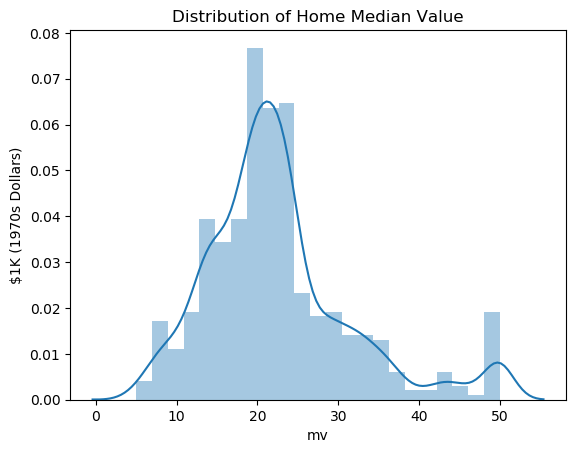

In [ ]:
sns.distplot(boston['mv'])
plt.title("Distribution of Home Median Value")
plt.ylabel("$1K (1970s Dollars)")
plt.show()

In [ ]:
# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(16,16))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)

<Figure size 640x480 with 0 Axes>

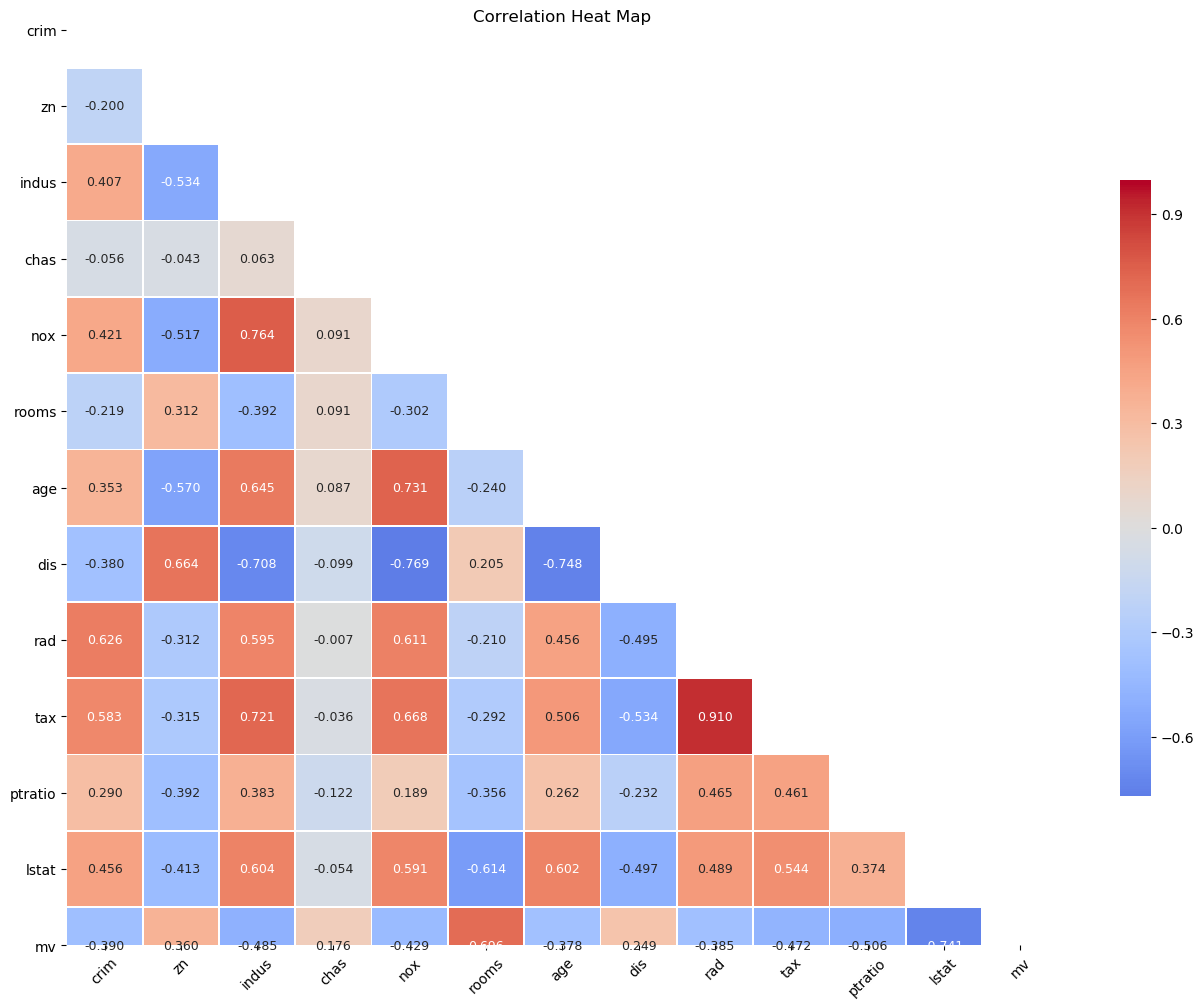

In [ ]:
# examine correlations among boston housing data set
# with correlation matrix/heat map
corr_chart(df_corr = boston) 

#What does the below plot indicate ?

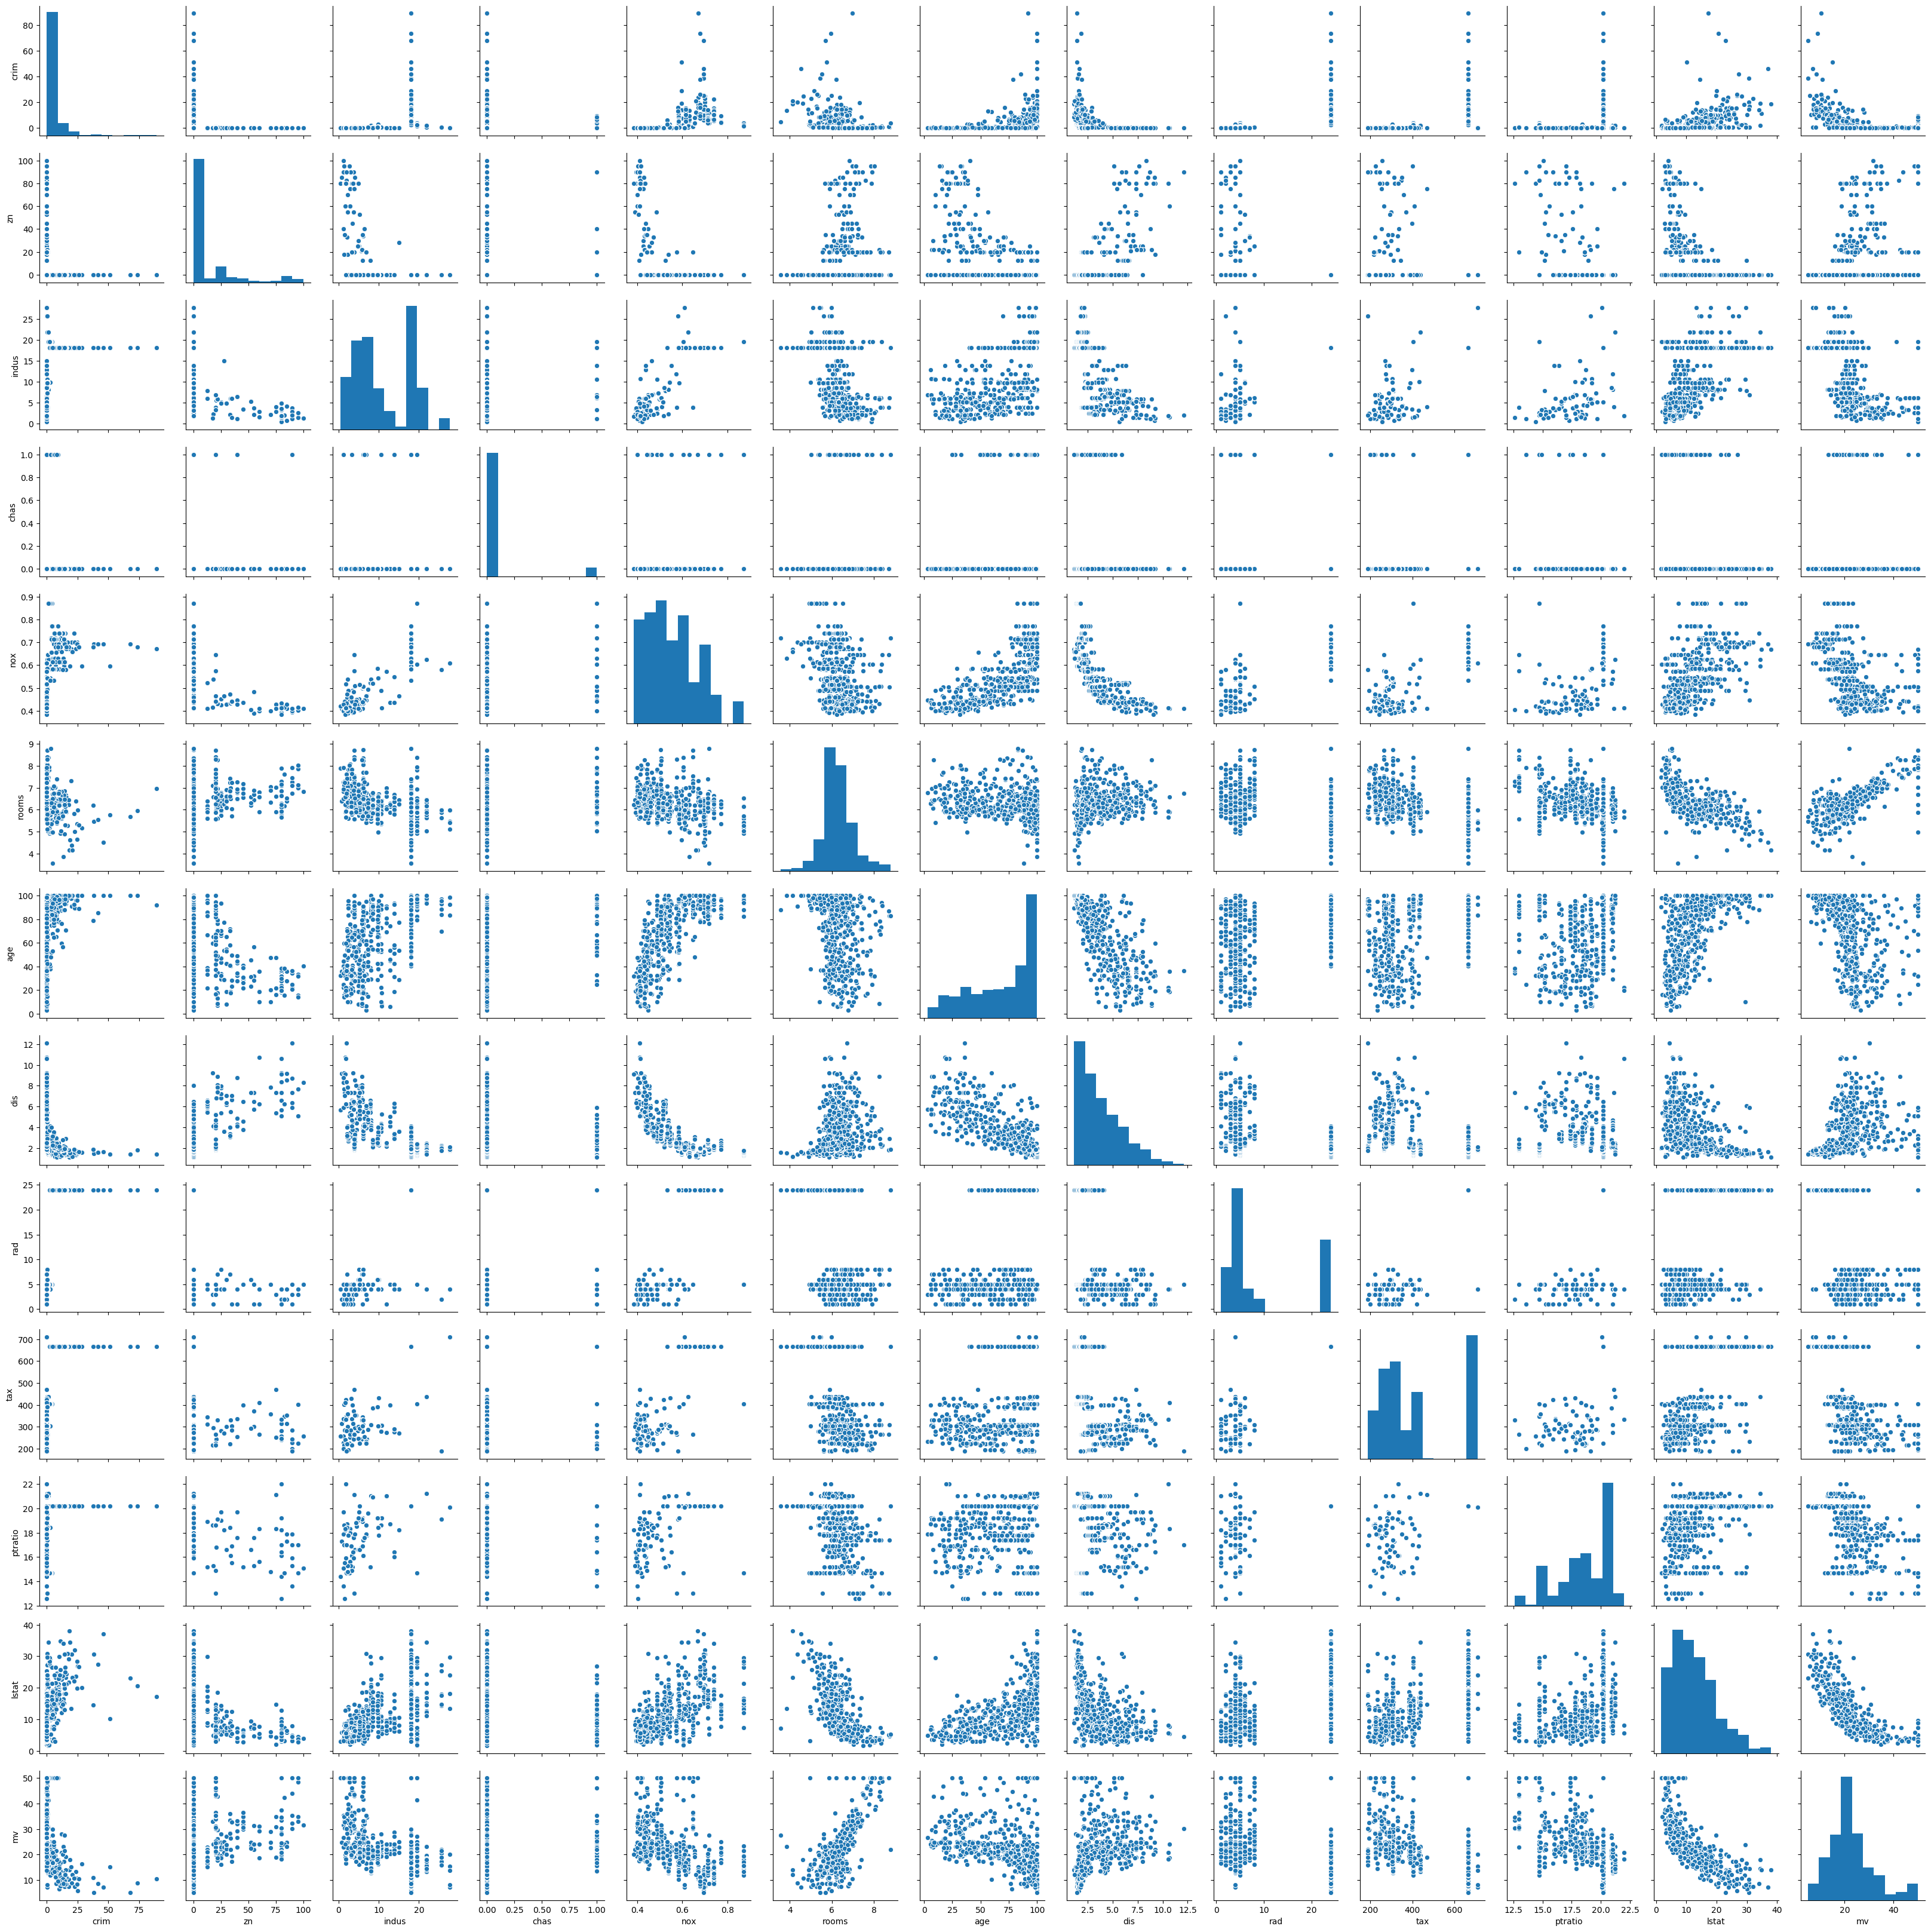

In [ ]:
sns.pairplot(boston)
plt.show()

# Thoughts on the pair plots ?

In [ ]:
# Initializing the X and Y variables
import math
X = boston[['crim','zn','indus','chas','nox','rooms','age','dis','rad','tax','ptratio','lstat']]
y = boston['mv']
feature_cols = ['crim','zn','indus','chas','nox','rooms','age','dis','rad','tax','ptratio','lstat']

# Splitting the boston dataframe into train and test sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=1337)
# print(X_train.head(5))
# print(y.head(5))

# Log transformation of target variable
y_log = np.log(boston['mv'])
# print(y_log.head(5))

# Splitting the boston dataframe into train and test sets accounting for the log transformation of the Target Variable
X_train, X_test, y_log_train, y_log_test = model_selection.train_test_split(X, y_log, test_size=0.33, random_state=1337)
# print(X_train.head(5))

In [ ]:
# Normalizing the data set using the MinMaxScaler transformation 

scaler = preprocessing.MinMaxScaler()
# scaler.fit(X_train)

# X_train_norm = scaler.transform(X_train)
X_train_norm = scaler.fit_transform(X_train)   # This line is a combination of the 2 lines above
X_test_norm = scaler.transform(X_test)
# X_norm = scaler.fit_transform(X)

pd.DataFrame(data=X_train_norm, columns=X_train.columns).describe()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000
mean,0.039520,0.105354,0.399063,0.073746,0.357143,0.531510,0.666497,0.272184,0.368988,0.421434,0.613946,0.327926
std,0.091874,0.222944,0.255219,0.261744,0.242499,0.135374,0.300365,0.219674,0.373885,0.321101,0.234487,0.211553
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000890,0.000000,0.173387,0.000000,0.150206,0.453918,0.398188,0.098773,0.130435,0.176864,0.468085,0.151483
50%,0.003071,0.000000,0.338343,0.000000,0.314815,0.518763,0.766525,0.204537,0.173913,0.271511,0.680851,0.292070
75%,0.039851,0.125000,0.646628,0.000000,0.491770,0.595081,0.940299,0.418971,1.000000,0.913958,0.808511,0.460654
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# MinMaxScaler to normalize the entire dataset
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_norm = scaler.transform(X)

pd.DataFrame(data=X_norm, columns=X.columns).describe()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040544,0.113636,0.391378,0.069170,0.349167,0.529581,0.664978,0.278472,0.371713,0.421104,0.622929,0.330601
std,0.096679,0.233225,0.251479,0.253994,0.238431,0.136616,0.300094,0.223738,0.378576,0.322251,0.230313,0.216134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.035181,-0.004739,0.000000,-0.001912,0.000000,0.000000
25%,0.000851,0.000000,0.173387,0.000000,0.131687,0.451974,0.413913,0.098388,0.130435,0.173996,0.510638,0.157990
50%,0.002812,0.000000,0.338343,0.000000,0.314815,0.514777,0.760128,0.216039,0.173913,0.271511,0.686170,0.291465
75%,0.041258,0.125000,0.646628,0.000000,0.491770,0.595470,0.936834,0.426523,1.000000,0.913958,0.808511,0.460805
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.014777,1.000000,1.163715,1.000000,1.000000,1.000000,1.096852


###### Normalizing all Features to the same Magnitude Using MinMaxScaler
From the output of the MinMaxScaler above, the mean represents the interest level.
It should be noted that most of the times, features in datasets vary highly in magnitudes, units and range. Given that most of the machine learning algorithms use the Eucledian distance between two datapoints in their computation, the varying magnitudes, units and range of the features pose a problem where by the ML algorithms would take into account only the magnitudes ignoring the units. As a result, features with high magnitudes would weigh alot more in the Eucladian distance calculations than those with low magnitudes.
As a mitigation step, all the features were normalized to the same magnitude level using the MinMaxScaler in SciKit package.

THOUGHTS ON THE ABOVE ?

In [ ]:
# HOW ABOUT USING STANDARD SCALAR

# standard scores for the columns... along axis 0
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(prelim_model_data))

StandardScaler()


In [ ]:
# show standardization constants being employed
print(scaler.mean_)
print(scaler.scale_)

[2.25288538e+01 3.61352356e+00 1.13636364e+01 1.11367787e+01
 6.91699605e-02 5.54695059e-01 6.28463439e+00 6.85749012e+01
 3.79504269e+00 9.54940711e+00 4.08237154e+02 1.84555336e+01
 1.26530632e+01]
[9.17309810e+00 8.59304135e+00 2.32993957e+01 6.85357058e+00
 2.53742935e-01 1.15763115e-01 7.01922514e-01 2.81210326e+01
 2.10362836e+00 8.69865112e+00 1.68370495e+02 2.16280519e+00
 7.13400164e+00]


In [ ]:
# the model data will be standardized form of preliminary model data
model_data = scaler.fit_transform(prelim_model_data)

In [ ]:
# dimensions of the polynomial model X input and y response
# all in standardized units of measure
print('\nDimensions for model_data:', model_data.shape)


Dimensions for model_data: (506, 13)


###### MODEL 1: Linear Regression 
Linear regression and CrossValidation regression performed and both the RMSE and Accuracy for the models were computed for evaluation.

In [ ]:
# LinearRegression()
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

lr = LinearRegression()
lr.fit(X_train_norm,y_train)

# Compute RMSE on training / test / Entire datasets
y_pred_train_lr = lr.predict(X_train_norm)
y_pred_test_lr = lr.predict(X_test_norm)
y_pred_all_lr = lr.predict(X_norm)

# Construct a vector of errors for train and test data sets
lr_err_train = abs(y_pred_train_lr - y_train)
lr_err_test = abs(y_pred_test_lr - y_test)
lr_err_all = abs(y_pred_all_lr - y)

# Compute MSE for Train set, Test set and Entire set
mse_lr_train = mean_squared_error(y_train, y_pred_train_lr)
mse_lr_test = mean_squared_error(y_test, y_pred_test_lr)
mse_lr_all = mean_squared_error(y, y_pred_all_lr)

# Compute RMSE for Train set, Test set and Entire set
rmse_lr_train = sqrt(abs(mse_lr_train))
rmse_lr_test = sqrt(abs(mse_lr_test))
rmse_lr_all = sqrt(abs(mse_lr_all))

# print("MSE - Lin Reg - train:    %.4f" % mse_lr_train)
# print("MSE - Lin Reg - test:     %.4f" % mse_lr_test)
# print("MSE - Lin Reg - all :     %.4f" % mse_lr_all)

# Cross Validation Regression MSE
seed = 7
kf = model_selection.KFold(n_splits=10, random_state=seed)
lr_kf = LinearRegression()
scoring_kf = 'neg_mean_squared_error'
results_kf_train = model_selection.cross_val_score(lr_kf, X_train_norm, y_train, cv=kf, scoring=scoring_kf)
results_kf_test  = model_selection.cross_val_score(lr_kf, X_test_norm, y_test, cv=kf, scoring=scoring_kf)
results_kf_all   = model_selection.cross_val_score(lr_kf, X_norm, y, cv=kf, scoring=scoring_kf)
# print("MSE: ", (results_kf.mean(), results_kf.std()))
# print("MSE: ", (results_kf.mean()))

# Computing RMSE
rmse_kf_train = sqrt(abs(results_kf_train.mean()))
rmse_kf_test  = sqrt(abs(results_kf_test.mean()))
rmse_kf_all   = sqrt(abs(results_kf_all.mean()))

# Compute Accuracy
acc_lr_train = lr.score(X_train_norm, y_train)
acc_lr_test  = lr.score(X_test_norm, y_test)
acc_lr_all   = lr.score(X_norm, y)

# Print Accuracy & RMSE
print('\nRMSE Summary for Linear Regression')
print('- - - - - - - - - - - - - - - - - - - -')
print("RMSE - Lin Reg - train:      %.4f" % rmse_lr_train)
print("RMSE - Lin Reg - test:       %.4f" % rmse_lr_test)
print("RMSE - Lin Reg - all :       %.4f" % rmse_lr_all)

print('\nACCURACY Summary')
print('- - - - - - - - - - - - - - - - - - - -')
print('Accuracy: Lin Reg - train:   ', round(100 * acc_lr_train, 2), '%')
print('Accuracy: Lin Reg - test:    ', round(100 * acc_lr_test, 2), '%')
print('Accuracy: Lin Reg - all:     ', round(100 * acc_lr_all, 2), '%')

print('\nRMSE Summary for 10-cv')
print('- - - - - - - - - - - - - - - - - - - -')
print("RMSE - 10cv - train:          %.4f" % rmse_kf_train)
print("RMSE - 10cv - test:           %.4f" % rmse_kf_test)
print("RMSE - 10cv - all:            %.4f" % rmse_kf_all)


RMSE Summary for Linear Regression
- - - - - - - - - - - - - - - - - - - -
RMSE - Lin Reg - train:      4.2155
RMSE - Lin Reg - test:       5.7638
RMSE - Lin Reg - all :       4.7822

ACCURACY Summary
- - - - - - - - - - - - - - - - - - - -
Accuracy: Lin Reg - train:    77.88 %
Accuracy: Lin Reg - test:     63.85 %
Accuracy: Lin Reg - all:      72.82 %

RMSE Summary for 10-cv
- - - - - - - - - - - - - - - - - - - -
RMSE - 10cv - train:          4.4929
RMSE - 10cv - test:           5.9328
RMSE - 10cv - all:            5.7967


In [ ]:
###### MODEL 2: RIDGE REGRESSION.......

In [ ]:
###### MODEL 3: LASSO REGRESSION

In [ ]:
###### MODEL 4: ELASTIC NET REGRESSION

In [ ]:
###### MODEL 5: RANDOM FOREST REGRESSOR MODEL (DEFAULT)

In [ ]:
###### MODEL 6: RANDOM FOREST REGRESSOR MODEL (WITH 2 PARAMETERS)

In [ ]:
.......

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
gbr_m1 = GradientBoostingRegressor(n_estimators=100)
gbr_m1.fit(X_train_norm, y_train)
y_pred = gbr_m1.predict(X_test)

# gbr_m1 Predictions
y_pred_gbr_m1_train = gbr_m1.predict(X_train_norm)
y_pred_gbr_m1_test  = gbr_m1.predict(X_test_norm)
y_pred_gbr_m1_all   = gbr_m1.predict(X_norm)

# Compute absolute errors
err_gbr_m1_train = abs(y_pred_gbr_m1_train - y_train)
err_gbr_m1_test  = abs(y_pred_gbr_m1_test - y_test)
err_gbr_m1_all   = abs(y_pred_gbr_m1_all - y)

# Compute Accuracy
acc_gbr_m1_train = gbr_m1.score(X_train_norm, y_train)
acc_gbr_m1_test  = gbr_m1.score(X_test_norm, y_test)
acc_gbr_m1_all   = gbr_m1.score(X_norm, y)

# Compute MSE
mse_gbr_m1_train = mean_squared_error(y_pred_gbr_m1_train, y_train)
mse_gbr_m1_test  = mean_squared_error(y_pred_gbr_m1_test, y_test)
mse_gbr_m1_all   = mean_squared_error(y_pred_gbr_m1_all, y)

# Compute RMSE
rmse_gbr_m1_train = sqrt(abs(mse_gbr_m1_train))
rmse_gbr_m1_test  = sqrt(abs(mse_gbr_m1_test))
rmse_gbr_m1_all   = sqrt(abs(mse_gbr_m1_all))

## Print Accuracy & RMSE
print('\nAccuracy Summary for Gradient Boosting Regression')
print('- - - - - - - - - - - - - - - - - - - - - - - - -')
print('Accuracy: gbr_m1 - train:          ', round(100 * acc_gbr_m1_train, 2), '%')
print('Accuracy: gbr_m1 - test:           ', round(100 * acc_gbr_m1_test, 2), '%')
print('Accuracy: gbr_m1 - all:            ', round(100 * acc_gbr_m1_all, 2), '%')

print('\nRMSE Summary for Gradient Boosting Regression')
print('- - - - - - - - - - - - - - - - - - - - - - - - -')
print('RMSE: gbr_m1 - train                %.4f' % rmse_gbr_m1_train)
print('RMSE: gbr_m1 - test                 %.4f' % rmse_gbr_m1_test)
print('RMSE: gbr_m1 - all                  %.4f' % rmse_gbr_m1_all)

In [ ]:
# ALTERNATE WAY
# --------------------------------------------------------
# specify the set of regression models being evaluated
# we set normalize=False because we have standardized
# the model input data outside of the modeling method calls
# Note how we are searching across many potential random forest
# models, varying the meta-parmeter associated with the maximum
# number of explanatory variables to include in each tree.
names = ['Linear_Regression', 'Ridge_Regression', 'Lasso_Regression', 
         'ElasticNet_Regression', 
         'Random_Forest_Regression_1', 
         'Random_Forest_Regression_2', 
         'Random_Forest_Regression_3', 
         'Random_Forest_Regression_4', 
         'Random_Forest_Regression_5', 
         'Random_Forest_Regression_6', 
         'Random_Forest_Regression_7', 
         'Random_Forest_Regression_8', 
         'Random_Forest_Regression_9', 
         'Random_Forest_Regression_10', 
         'Random_Forest_Regression_11', 
         'Random_Forest_Regression_12',          
         'Random_Forest_Regression_SQRT', 
         'Random_Forest_Regression_LOG2',
         'Random_Forest_Regression_N'] 

In [ ]:
# RandomForestRegressor default settings used with two exceptions
#     n_estimators = 100, (increase size for more stable estimators)
#     max_features = 'sqrt' (subset of features included in each tree,
#                             with 12 features sqrt(12) = 3.464 -> 3 in each tree)
#     max_features = 'log2' (ln(12)/ln(2) = 2.485/0.693 = 3.585 -> 3 in each tree
#                            given that the algorithm truncates)
#     min_impurity_split = 0.01




In [ ]:
# --------------------------------------------------------
# specify the k-fold cross-validation design
from sklearn.model_selection import KFold

# ten-fold cross-validation employed here
# As an alternative to 10-fold cross-validation, restdata with its 
# small sample size could be analyzed would be a good candidate
# for  leave-one-out cross-validation, which would set the number
# of folds to the number of observations in the data set.
N_FOLDS = 10

# set up numpy array for storing results
cv_results = np.zeros((N_FOLDS, len(names)))

kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)

# check the splitting process by looking at fold observation counts


print('\n----------------------------------------------')
print('Average results from ', N_FOLDS, '-fold cross-validation\n',
      'in standardized units (mean 0, standard deviation 1)\n',
      '\nMethod               Root mean-squared error', sep = '')     
print(cv_results.mean())   


----------------------------------------------
Average results from 10-fold cross-validation
in standardized units (mean 0, standard deviation 1)

Method               Root mean-squared error
0.0


In [ ]:
# ----------------------------------------------------------
# Fit ridge regression to entire data set and show results

reg_model.fit(X_train, y_train)  # fit on the train set for this fold
print('\n---------------------------------------------------------------------------')
print('Fitted Coefficients for Ridge Regression Model (Standardized Inputs)')

# set up DataFrame for reporting results

print(final_model_results)    

In [ ]:
# ----------------------------------------------------------
# Random forests is the best model of those examined
# In particular, we see that having a maximum of 7
# explanatory variables in each tree is best for this study.


reg_model.fit(X_train, y_train)  # fit on the train set for this fold
print('\n---------------------------------------------------------------------------')
print('Random Forests Regression Model Explanatory Variable Importance Results')
var_name = [    
    'crim',
    'zn',
    'indus',
    'chas',
    'nox',
    'rooms',
    'age',
    'dis',
    'rad',
    'tax',
    'ptratio',
    'lstat']
var_description = [  
    'Crime rate',
    'Percentage of land zoned for lots',
    'Percentage of business that is industrial or nonretail',
    'On the Charles River (1) or not (0)',
    'Air pollution (nitrogen oxide concentration)',
    'Average number of rooms per home',
    'Percentage of homes built before 1940',
    'Weighted distance to employment centers',
    'Accessibility to radial highways',
    'Tax rate',
    'Pupil/teacher ratio in public schools',
    'Percentage of population of lower socio-economic status']
var_importance = reg_model.feature_importances_
final_model_results = pd.DataFrame({'name': var_name,
                                    'description': var_description,
                                    'importance': var_importance})
    
print(final_model_results)     

###### MODEL PERFORMANCE REPORT / SUMMARY

In [ ]:
# MODEL ACCURACY REPORT SUMMARY

print('\nMODEL ACCURACY REPORT SUMMARY')
print('{}\t\t\t\t\t {}\t {}\t {}'.format('\nMODEL','TRAIN SET(%)','TEST SET(%)','ENTIRE SET(%)'))
print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')
print('{}\t\t {:.2f}\t\t {:.2f}\t\t {:.2f}'.format(M1_lr,ac_lr_train,ac_lr_test,ac_lr_all))
print('{}\t\t {:.2f}\t\t {:.2f}\t\t {:.2f}'.format(M2_ridge,ac_ridge_train,ac_ridge_test,ac_ridge_all))
print('{}\t\t {:.2f}\t\t {:.2f}\t\t {:.2f}'.format(M3_lasso,ac_lasso_train,ac_lasso_test,ac_lasso_all))
print('{}\t\t {:.2f}\t\t {:.2f}\t\t {:.2f}'.format(M4_en,ac_en_train,ac_en_test,ac_en_all))
print('{}\t\t {:.2f}\t\t {:.2f}\t\t {:.2f}'.format(M5_rf_m1,ac_ridge_train,ac_rf_m1_test,ac_rf_m1_all))
print('{}\t\t {:.2f}\t\t {:.2f}\t\t {:.2f}'.format(M6_rf_m2,ac_rf_m2_train,ac_rf_m2_test,ac_ef_m2_all))
print('{}\t {:.2f}\t\t {:.2f}\t\t {:.2f}'.format(M7_gbr,ac_gbr_m1_train,ac_gbr_m1_test,ac_gbr_m1_all))
print('{}\t\t {:.2f}\t\t {:.2f}\t\t {:.2f}'.format(M8_dt_m1,ac_dt_m1_train,ac_dt_m1_test,ac_dt_m1_all))

# MODEL RMSE REPORT SUMMARY

print('\nMODEL RMSE REPORT SUMMARY')
print('{}\t\t\t\t\t {}\t {}\t {}'.format('\nMODEL','TRAIN SET','TEST SET','ENTIRE SET'))
print('- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -')
print('{}\t\t {:.4f}\t\t {:.4f}\t\t {:.4f}'.format(M1_lr,rmse_lr_train,rmse_lr_test,rmse_lr_all))
print('{}\t\t\t {:.4f}\t\t {:.4f}\t\t {:.4f}'.format(M1_10cv,rmse_kf_train,rmse_kf_test,rmse_kf_all))
print('{}\t\t {:.4f}\t\t {:.4f}\t\t {:.4f}'.format(M2_ridge,rmse_ridge_train,rmse_ridge_test,rmse_ridge_all))
print('{}\t\t {:.4f}\t\t {:.4f}\t\t {:.4f}'.format(M3_lasso,rmse_lasso_train,rmse_lasso_test,rmse_lasso_all))
print('{}\t\t {:.4f}\t\t {:.4f}\t\t {:.4f}'.format(M4_en,rmse_en_train,rmse_en_test,rmse_en_all))
print('{}\t\t {:.4f}\t\t {:.4f}\t\t {:.4f}'.format(M5_rf_m1,rmse_rf_m1_train,rmse_rf_m1_test,rmse_rf_m1_all))
print('{}\t\t {:.4f}\t\t {:.4f}\t\t {:.4f}'.format(M6_rf_m2,rmse_rf_m2_train,rmse_rf_m2_test,rmse_rf_m2_all))
print('{}\t {:.4f}\t\t {:.4f}\t\t {:.4f}'.format(M7_gbr,rmse_gbr_m1_train,rmse_gbr_m1_test,rmse_gbr_m1_all))
print('{}\t\t {:.4f}\t\t {:.4f}\t\t {:.4f}'.format(M8_dt_m1,rmse_dt_m1_train,rmse_dt_m1_test,rmse_dt_m1_all))

#### Boston_Housing_Study
#### REPORT/FINDINGS: 
(1) A summary and problem definition for management; 

(2) Discussion of the research design, measurement and statistical methods, traditional and machine learning methods employed 

(3) Overview of programming work; 

(4) Review of results with recommendations for management.